<h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
<br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
</br>
<h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

</br>
</br>
 </br>
 </br>
 </br>

 <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
 <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

 </br>
 </br>
 </br>
 </br>
 </br>

 <h5 style="text-align: right;">Студент: Каирова Екатерина </h5>
 <h5 style="text-align: right;">5 вариант</h5>
 <h5 style="text-align: right;">Группа: ТФэ-01-21 </h5>

 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>

 <h5 style="text-align: center;">Москва 2024</h5>



 ### $\space$ Дано:
  * $P_0 = 25 \space МПа $ - начальное давление
  * $t_0 = 600 ^\circ C$ -  начальная температура
  * $P_{пп} = 4 \space МПа$ -  давление промперегрева
  * $t_{пп} = 600 ^\circ C$ -  температура промперегрева
  * $P_{к} = 3.5 \space кПа$ -  давление в конденсаторе
  * $t_{п.в.} = 260^\circ C$ -  температура питательной воды

  * $N_{э} = 330 \space МВт$ -  электрическая мощность
  * z = 8 -  число регенеративных подогревателей

# 1. Построение процесса расширения пара в турбине.
## 1.1 Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

In [48]:
electrical_power = 810 * 10 ** 6
p0 = 25 * 10 ** 6
t0 = 600
p_middle = 4 * 10 ** 6
t_middle = 600
pk = 3.5 * 10 ** 3
t_feed_water = 260
p_feed_water = 1.4 * p0
z = 8
H_0=100*1000
n = 50
avg_diameter = 1.1


In [49]:
import kr1

# Из графика получаем, что коэффициент равен 0.89

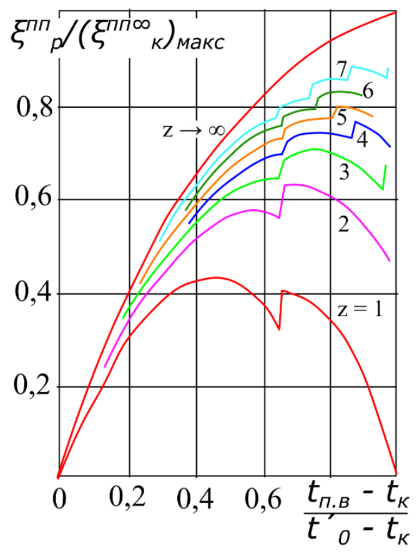


### Массовый расход в турбину на входе составляет (в кг/с)

In [50]:
kr1.f_inlet_mass_flow(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)

587.7370259656674

### Массовый расход в конденсатор составляет (в кг/с)

In [51]:
kr1.f_condenser_mass_flow(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)

399.4211512596221

### Процесс расширения пара в турбине

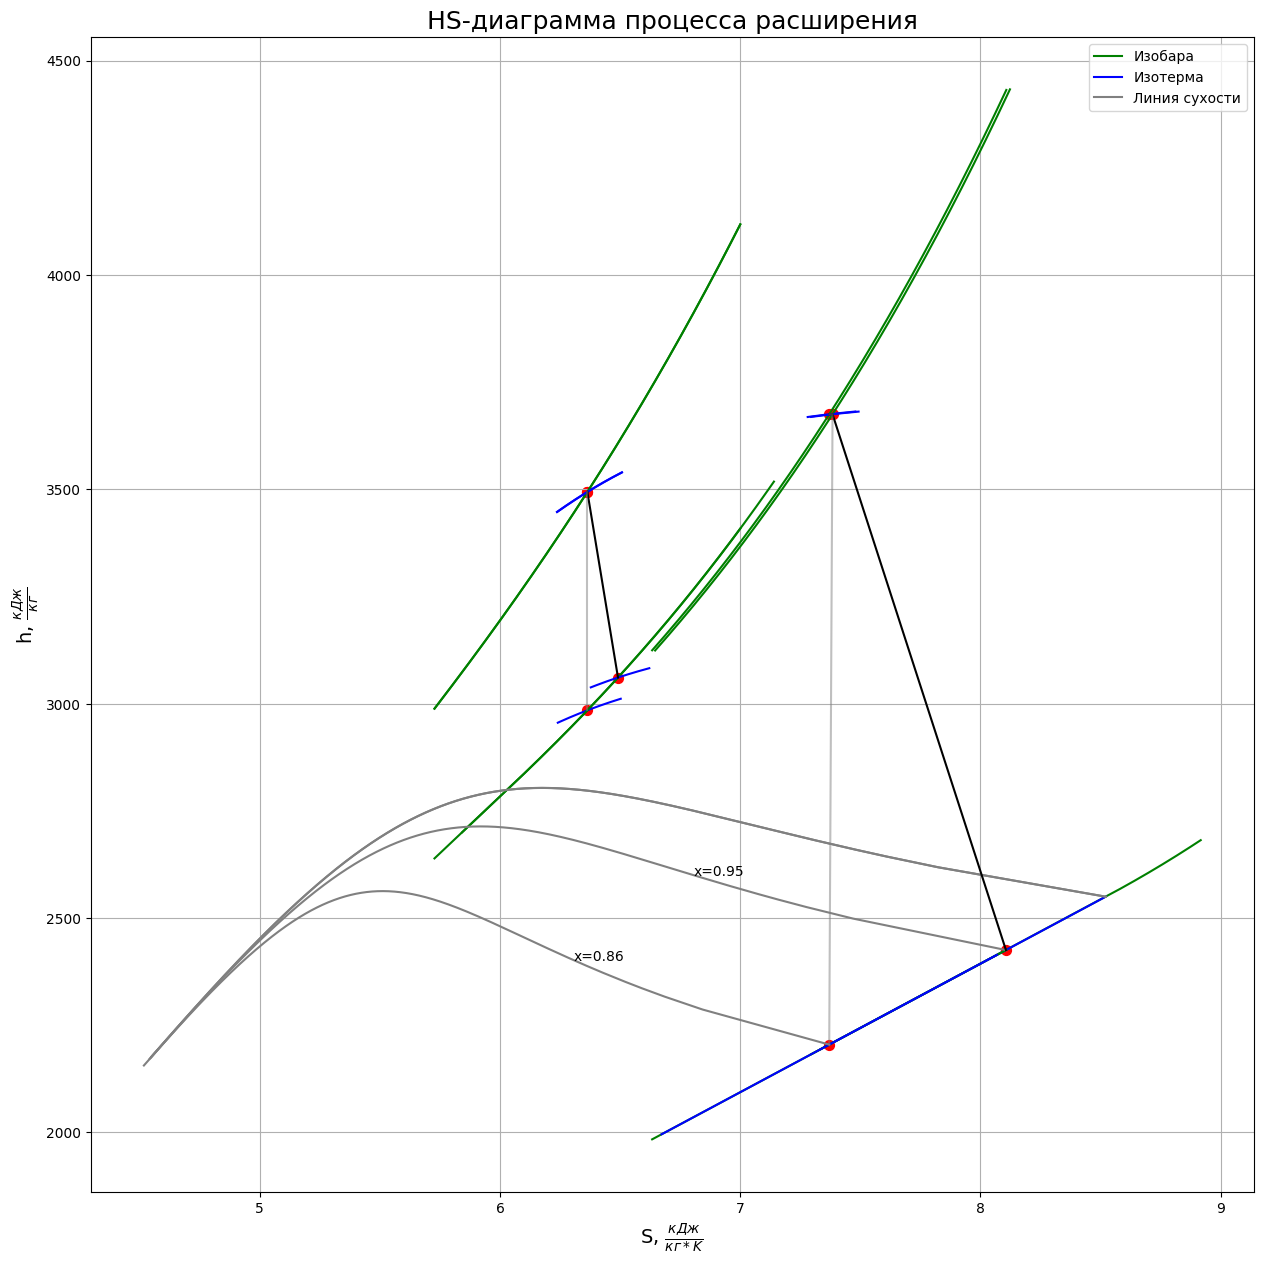

In [52]:
fig, ax  = kr1.plt.subplots(1, 1, figsize=(15, 15))
kr1.plot_hs_diagram(
    ax,
    points=[kr1.f__point_0(p0, t0),kr1.f_point_0(p0, t0), kr1.f_point_1t(p_middle,p0, t0), kr1.f_point_1(p0, t0, p_middle),
            kr1.f__point_middle(p_middle, t_middle), kr1.f_point_middle(p_middle, t_middle), 
            kr1.f_point_2(pk,p_middle, t_middle), kr1.f_point_2t(pk,p_middle, t_middle)]                                 )
kr1.plot_process(ax, points=[kr1.f__point_0(p0, t0), kr1.f_point_0(p0, t0), kr1.f_point_1(p0, t0, p_middle)], color='black')
kr1.plot_process(ax, points=[kr1.f__point_middle(p_middle, t_middle), kr1.f_point_middle(p_middle, t_middle), 
                         kr1.f_point_2(pk,p_middle, t_middle)],color='black')
kr1.plot_process(ax, points=[kr1.f__point_0(p0, t0), kr1.f_point_0(p0, t0), kr1.f_point_1t(p_middle,p0, t0)], alpha=0.5, 
             color='grey')
kr1.plot_process(ax, points=[kr1.f__point_middle(p_middle, t_middle), kr1.f_point_middle(p_middle, t_middle), 
                         kr1.f_point_2t(pk,p_middle, t_middle)], alpha=0.5, color='grey')

# 2. Проведение расчета регулирующей ступени.

### Принимаемые значения для расчёта регулирующей ступени

In [10]:
ro = 0.075
alpha_1e = 12
b_1 = 100*10**(-3)
delta = 0.004

### Выбранный тип сопловой решётки С-90-12А и её параметры

In [11]:
alpha_0=90
t_1_opt = 0.75
M_1t = 0.85 

### Отношение для нахождения коэффициента потерь в сопловой решётке

In [12]:
b_l = b_1/kr1.f_l_1(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,avg_diameter)
b_l

2.1641457986725285

### По графику определяем коэффициент потерь в сопловой решётке 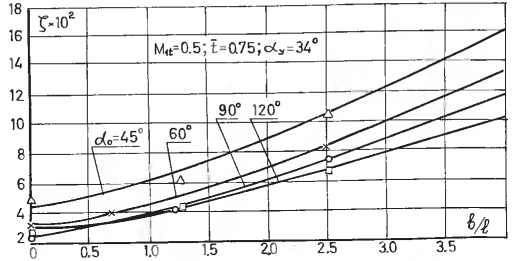

In [13]:
ksi_sum = 6.7

### Расхождение между коэффициентами скорости сопловой решётки меньше 1 % 

In [14]:
kr1.f_delta_fi(ksi_sum,b_1,electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,avg_diameter)

0.3346467801055997

### Выбранный тип рабочей решётки Р-30-21А и её параметры

In [15]:
beta_0 = 25
beta_2e = 23
t_opt = 0.6
M_2t = 0.9

f_2 = 1.85 * (10**(-4))
I_2_min = 0.205 * 10**(-8)
J = I_2_min
t_2opt = 0.6
b2_atl = 25.6* 10 **(-3)
W2_min_atl = 0.234 *10** (-6)

In [16]:
b_2 = 0.0805

### Отношение для нахождения коэффициента потерь в рабочей решётке

In [17]:
b_l = b_2/kr1.f_l_2(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,avg_diameter)
b_l

1.6033426753442408

### По графику определяем коэффициент потерь в рабочей решётке 



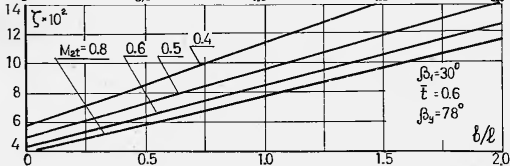

In [18]:
ksi_sum_g = 9.7

### Расхождение между коэффициентами скорости сопловой решётки около 1 %

In [19]:
kr1.f_delta_psi(b_2,electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e, avg_diameter)

1.337515749501916

### Расхождение между относительными лопаточными КПД меньше 1%

In [20]:
kr1.f_delta_eff_ol(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum,avg_diameter, n,ksi_sum_g,beta_2e,b_2)

0.288081234367648

### Для дальнейшего расчёта принимем

In [21]:
k_tr = 0.7 * 10 ** (-3)
k_v = 0.065
m = 1
i = 4

mu_a = 0.5
delta_a = 0.0025
mu_r = 0.75
z = 8

### Использованный теплоперепад ступени (кДж/кг)

In [22]:
kr1.f_H_i(mu_a,delta_a,z,mu_r,k_tr,k_v,m,i,electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum,avg_diameter, n,ksi_sum_g,beta_2e,b_2)/1000


80.04247006597222

### Внутренний относительный КПД ступени 

In [23]:
kr1.f_eff_oi(mu_a,delta_a,z,mu_r,k_tr,k_v,m,i,electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum, avg_diameter, n,ksi_sum_g,beta_2e,b_2)

0.8004247006597223

### Внутренняя мощность ступени кВт

In [24]:
kr1.f_N_i(mu_a,delta_a,z,mu_r,k_tr,k_v,m,i,electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum, avg_diameter, n,ksi_sum_g,beta_2e,b_2)/1000

47043.92330752047

### Расчётное значение изгибающего напряжения в рабочей лопатке меньше чем допускаемое, равное 20 МПа 

In [25]:
kr1.f_sigma_izg(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum,avg_diameter, n,ksi_sum_g,beta_2e,W2_min_atl,b_2,b2_atl,t_2opt)

18.454650729236327

### Расчётное значение напряжения растяжения в корневом сечении рабочей лопатки меньше чем допускаемое, равное 450 МПа 

In [26]:
kr1.f_sigma_p(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,n,avg_diameter)

21.256949879379338

### Графики зависимости относительного лопаточного кпд от параметров

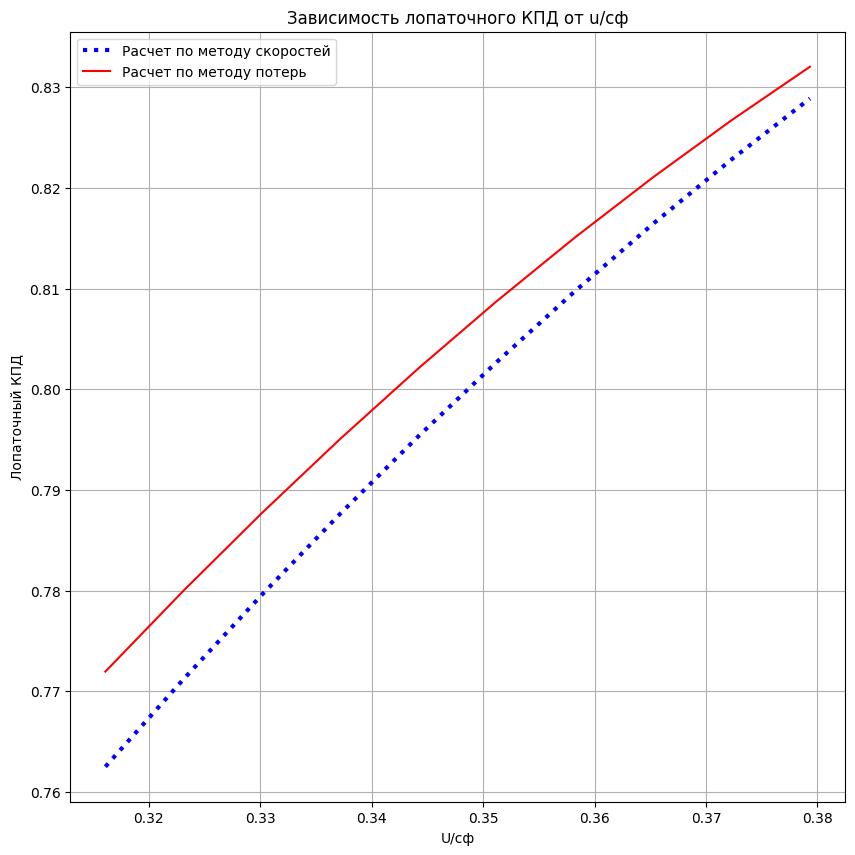

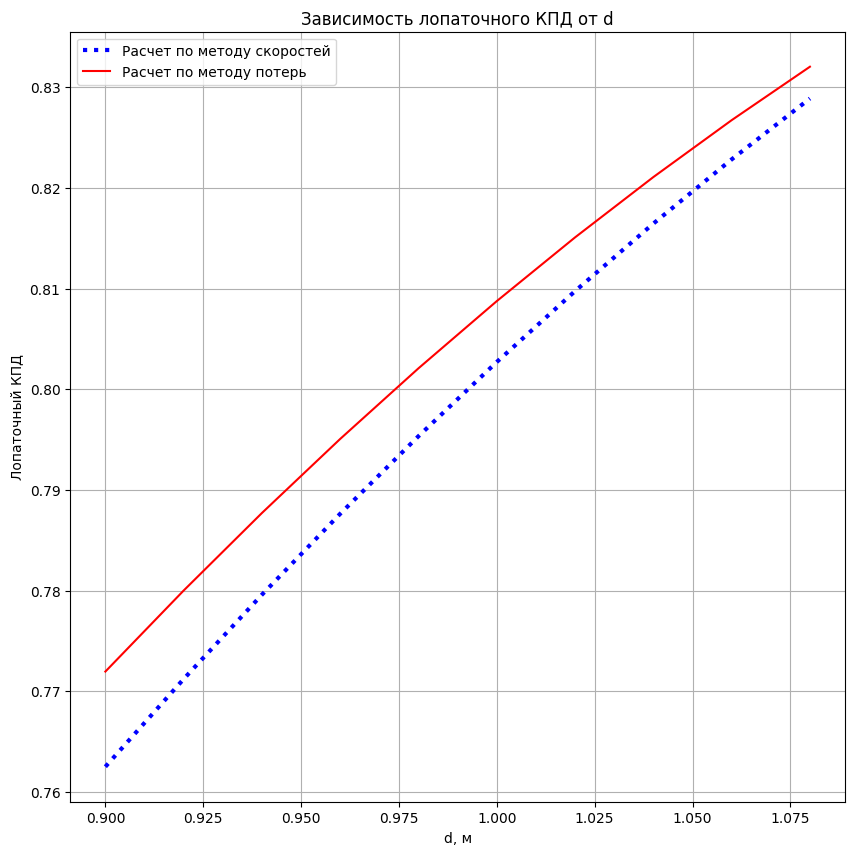

In [27]:
kr1.plot_u_cf(n, electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum, ksi_sum_g,beta_2e,b_2)

### Максимальный относительный лопаточный КПД 

In [28]:
kr1.f_eff_ol(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum,avg_diameter, n,ksi_sum_g,beta_2e,b_2)

0.8370136989278398

### Треугольники скоростей 

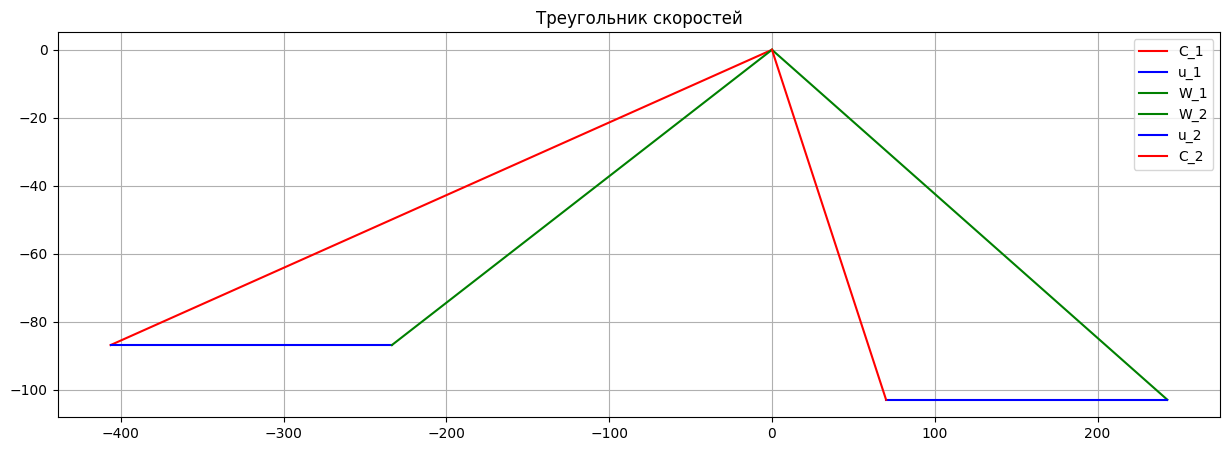

In [29]:
kr1.plot_treyg_speed(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum, beta_2e,b_2,ksi_sum_g,avg_diameter, n)

### Процесс расширения в регулирующей ступени

(3200.0, 3400.0)

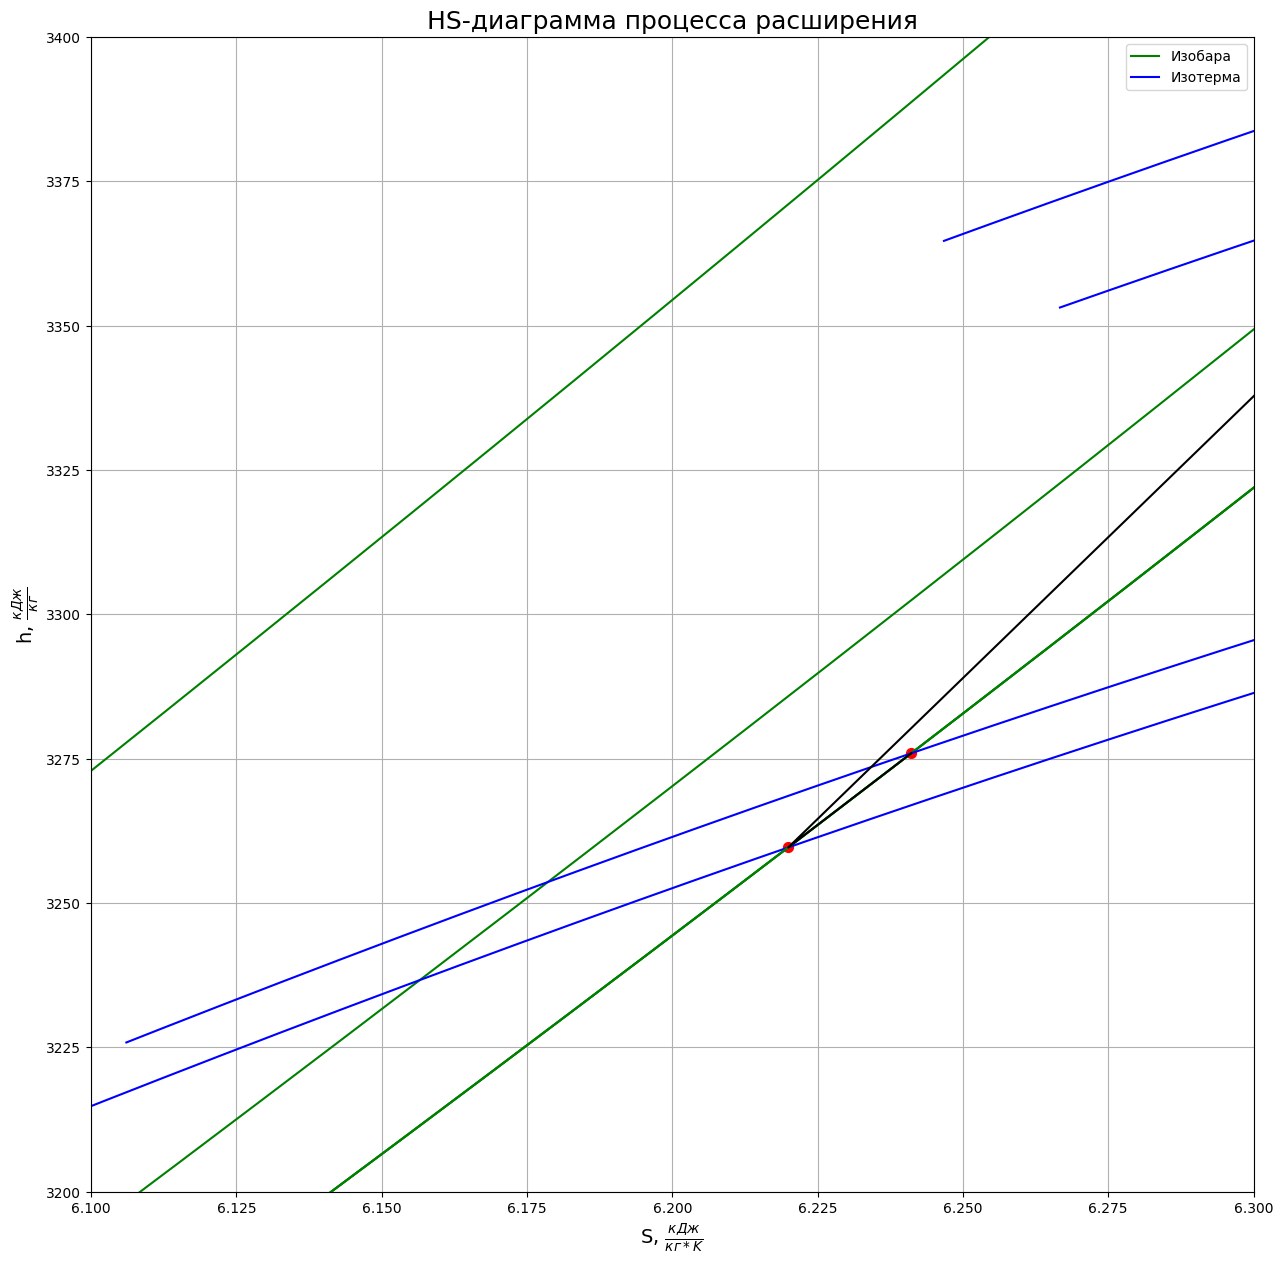

In [30]:
fig, ax  = kr1.plt.subplots(1, 1, figsize=(15, 15))
kr1.plot_hs_diagram(
    ax,
    points=[kr1.f_point_0(p0, t0), 
            kr1.f_point_1_(ro,H_0,p0, t0,ksi_sum), kr1.f_point_2_(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum,avg_diameter, n, ksi_sum_g),
            kr1.f_point_t_konec(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum,avg_diameter, n, ksi_sum_g), kr1.f_pont_poter(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, b_1, 
                             ksi_sum,alpha_1e, avg_diameter, n,ksi_sum_g,beta_2e,b_2)]                                 )
kr1.plot_process(ax, points=[kr1.f_point_0(p0, t0), kr1.f_point_1_(ro,H_0,p0, t0,ksi_sum),kr1.f_point_2_(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum,avg_diameter, n, ksi_sum_g),
                        kr1.f_pont_poter(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, b_1, 
                             ksi_sum,alpha_1e, avg_diameter, n,ksi_sum_g,beta_2e,b_2)], color='black')
kr1.plot_process(ax, points=[kr1.f_point_0(p0, t0),kr1.f_point_t_konec(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1, ksi_sum,avg_diameter, n, ksi_sum_g)],color='black')
kr1.plt.xlim([6.1,6.3])
kr1.plt.ylim([3200,3400])

Для ступени параметры газа в каждой точке 

In [ ]:
kr1.f_table_parametrs(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1,
                     ksi_sum,avg_diameter, n, ksi_sum_g,beta_2e,b_2)

# 3. Определение числа ступеней и распределение параметров по ним.

### Зададимся числом ступеней по прототипу турбины K-300-23.5 ЛМЗ

In [ ]:
n_stages = 9

In [ ]:
kr1.f_n_st_rasch(n,mu_a,delta_a,z,mu_r,k_tr,k_v,m,i,electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,avg_diameter,n_stages,ksi_sum, b_1)

### Графики зависимостей параметров от номера ступени

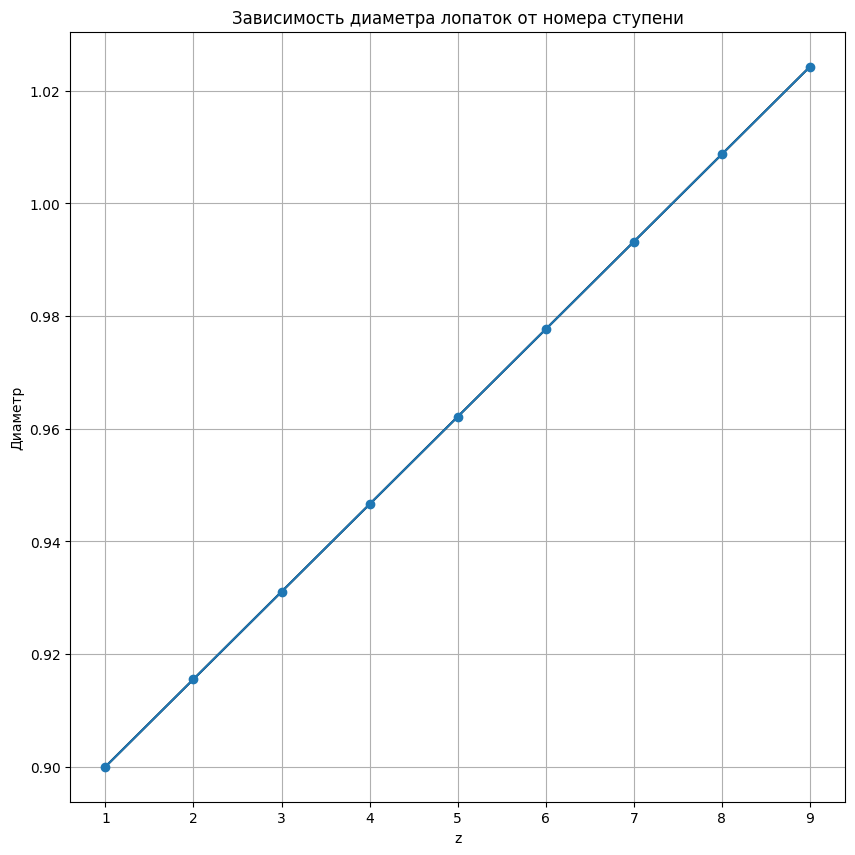

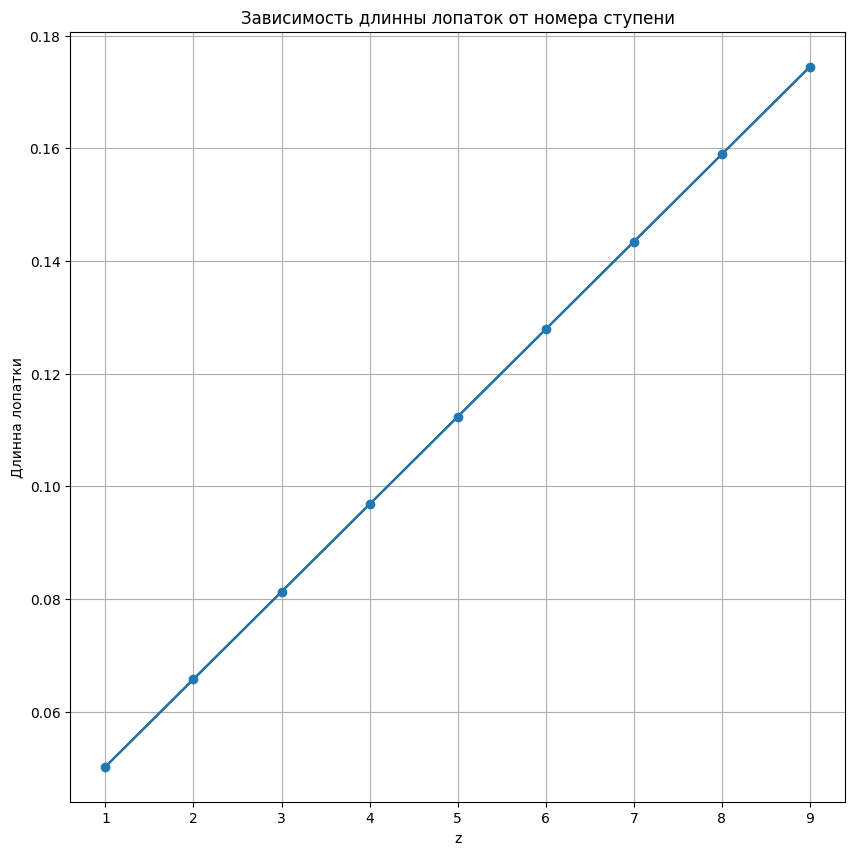

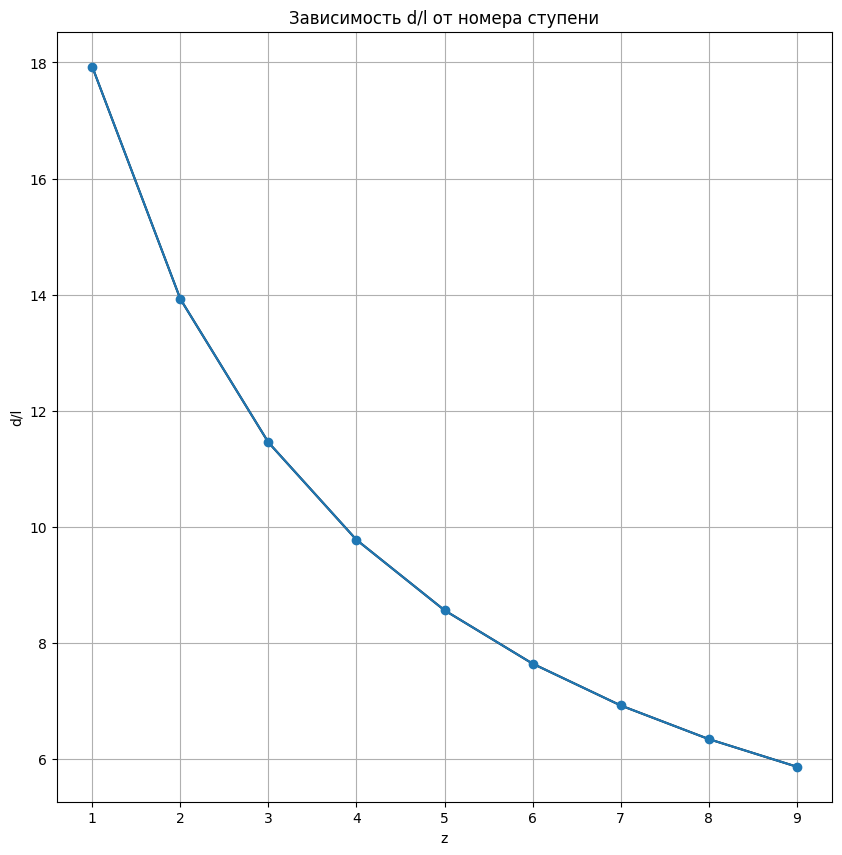

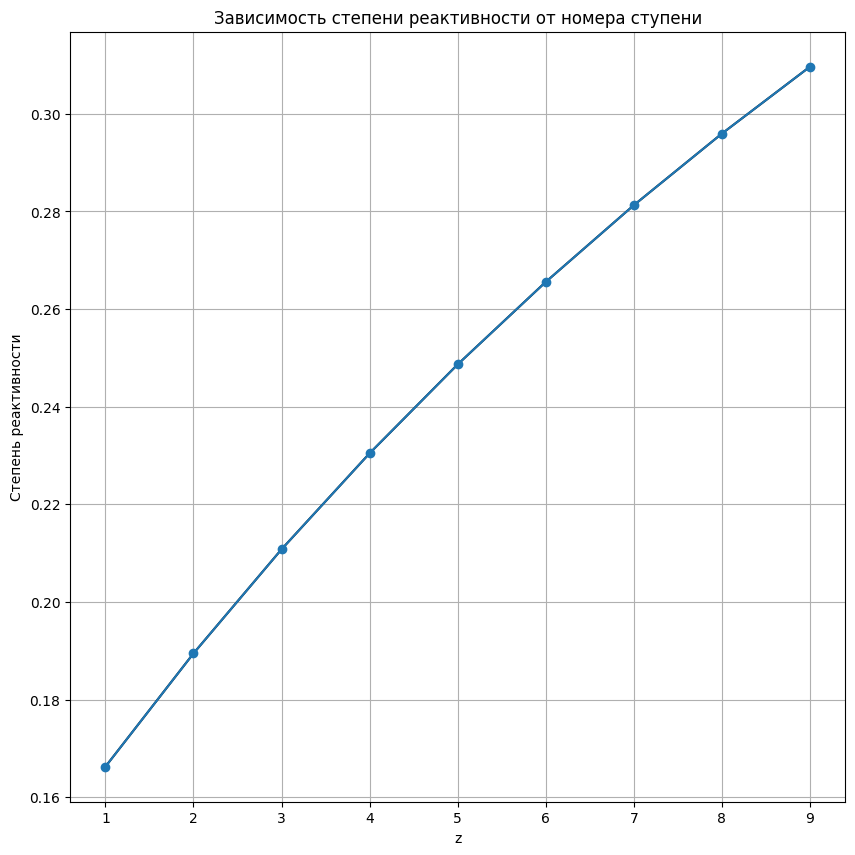

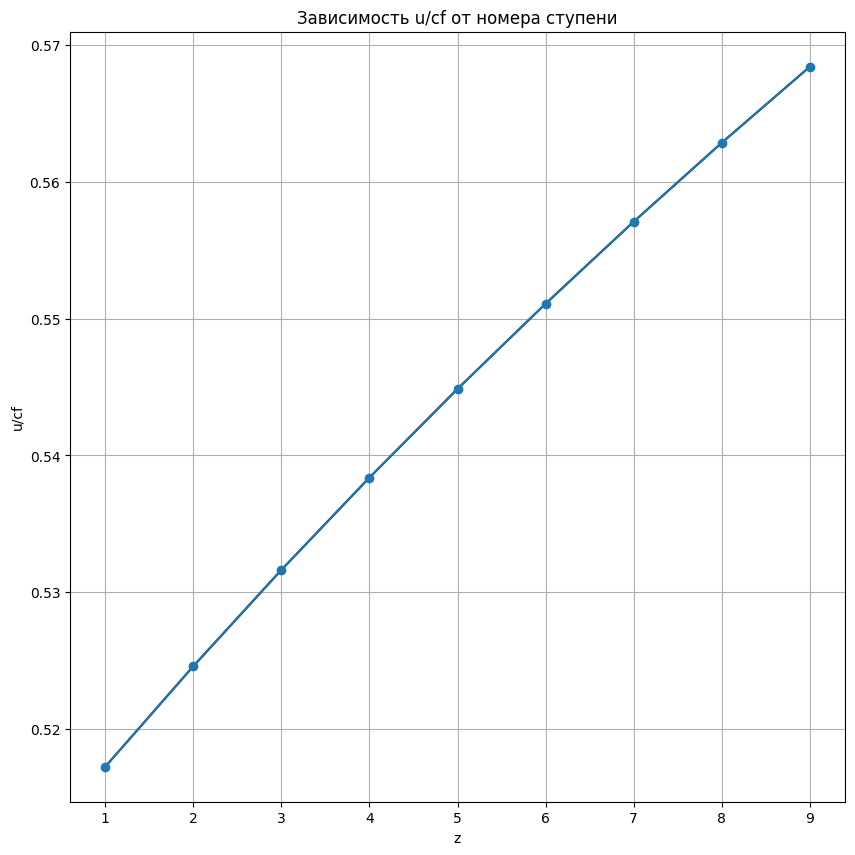

ValueError: x and y must have same first dimension, but have shapes (9,) and (12,)

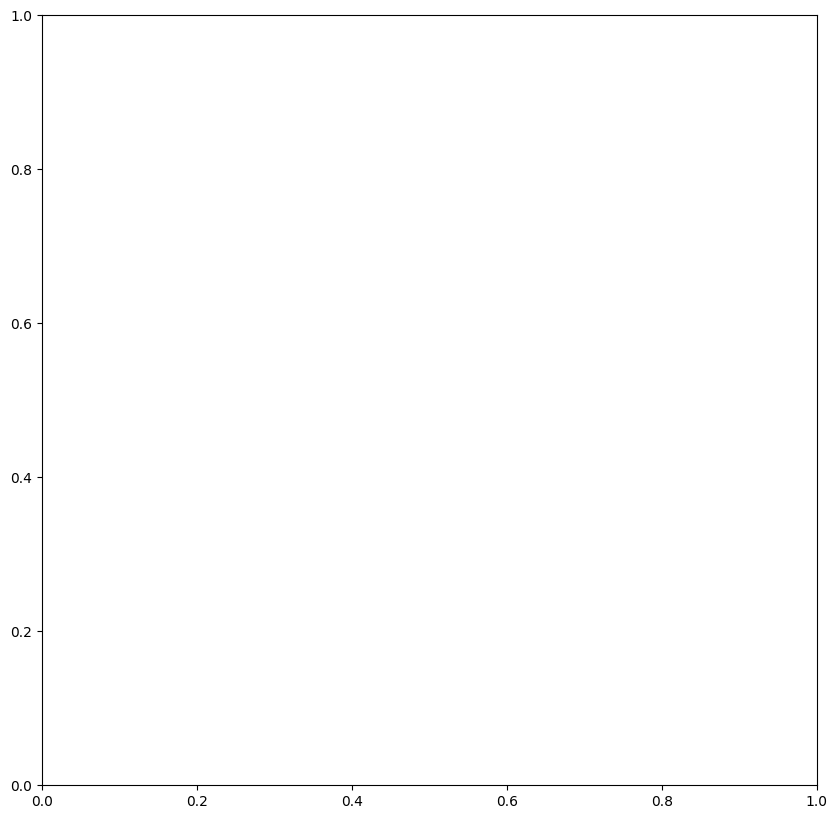

In [47]:
kr1.plot_ot_z(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,b_1,ksi_sum,avg_diameter,n_stages,n,mu_a,delta_a,z,mu_r,k_tr,k_v,m,i,  ksi_sum_g,beta_2e,b_2)

### Для прочностных расчетов принимаем

In [ ]:
ro_metal = 7800 
max_stress_1 = 235 * 10**6
nu = 0.3
sigma_1 = 0
sigma_2 = 100 * 10**6
max_stress_2 = 510 * 10**6
r_2 = 0.56
r = 0
E = 2 * 10 ** 11
m = 12
t = 25 * 10**(-3)
delta = 5 * 10**(-3)
b = 40 * 10**(-3)
delta_op = 0.5 * 10 ** -9
C_h = 0.5 * 10 ** 9

### Значение гибкости лопатки для нахождения коэффициента

In [55]:
kr1.f_lambd(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,avg_diameter,J,f_2,ksi_sum,n, ksi_sum_g)

57.077358400160165

### Определяем поправочный коэффицент
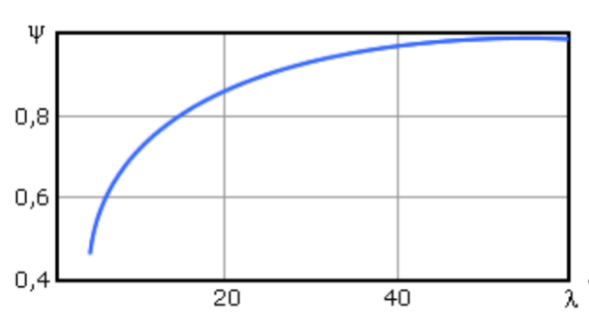

In [ ]:
psi = 0.99

### Примимаем, что бандаж припаян к перу лопаток

In [ ]:
H = 0.6

### Для определения поправочного коэффициента определяем коэффицент жесткости бандажа и отношение массы бандажа, приходящей на одну лопатку, к массе лопатки

In [56]:
kr1.f_k(b,electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,beta_2e,avg_diameter,b_2,t_2opt,delta,J,m,H,E,t,ksi_sum,n, ksi_sum_g)


9.982113040711987

In [57]:
kr1.f_NU(b,f_2,t,electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,avg_diameter,ksi_sum,n, ksi_sum_g)


0.14224707482281268

### Определяем множитель, учитывающий влияние жесткости и массы надбандажной ленты
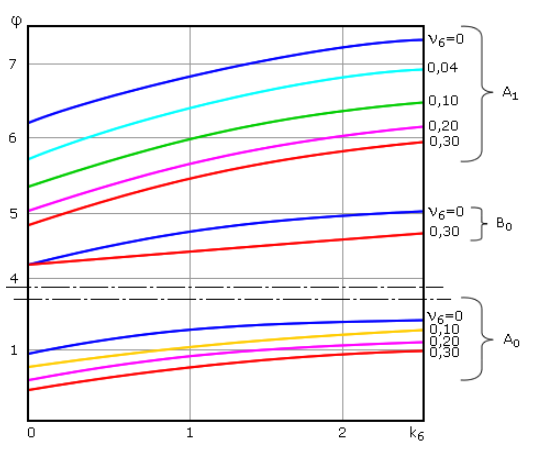

In [58]:
fi = 1.5

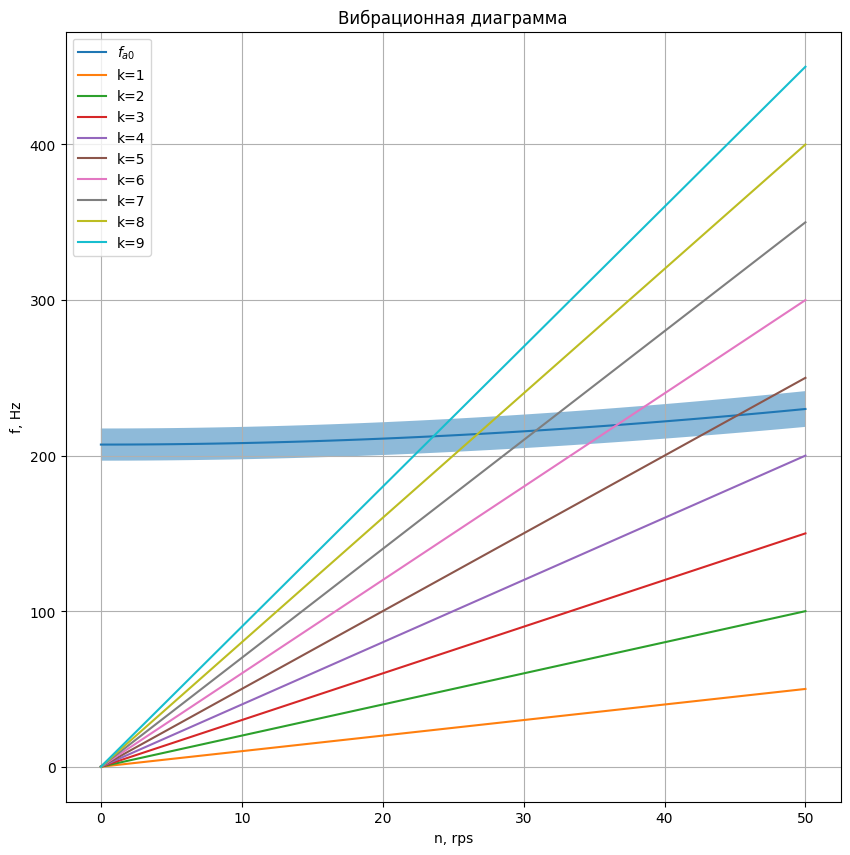

In [59]:
kr1.plot_freq(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,avg_diameter,psi, E,f_2,J,ro_metal,ksi_sum,b,beta_2e,b_2,t_2opt,n)

### По построенной модели снимаем параметры

In [60]:
mass = 10954.644
L = 5
L_r = 5.8
d = 560 * 10**(-3)
d_0 = 100 * 10**(-3)

### Коэффициент запаса прочности

In [61]:
kr1.f_n(max_stress_2,sigma_2,nu,avg_diameter, n,ro_metal,r_2,r)

4.183502211389207

### Первая критическая частота ротора (Гц)

In [62]:
kr1.f_P_1(L,mass,L_r,C_h,delta_op,d,d_0)

30.264956004768944

### Вторая критическая частота ротора (Гц)

In [63]:
kr1.f_P_2(C_h,delta_op,L,L_r,mass,d,d_0)

60.0

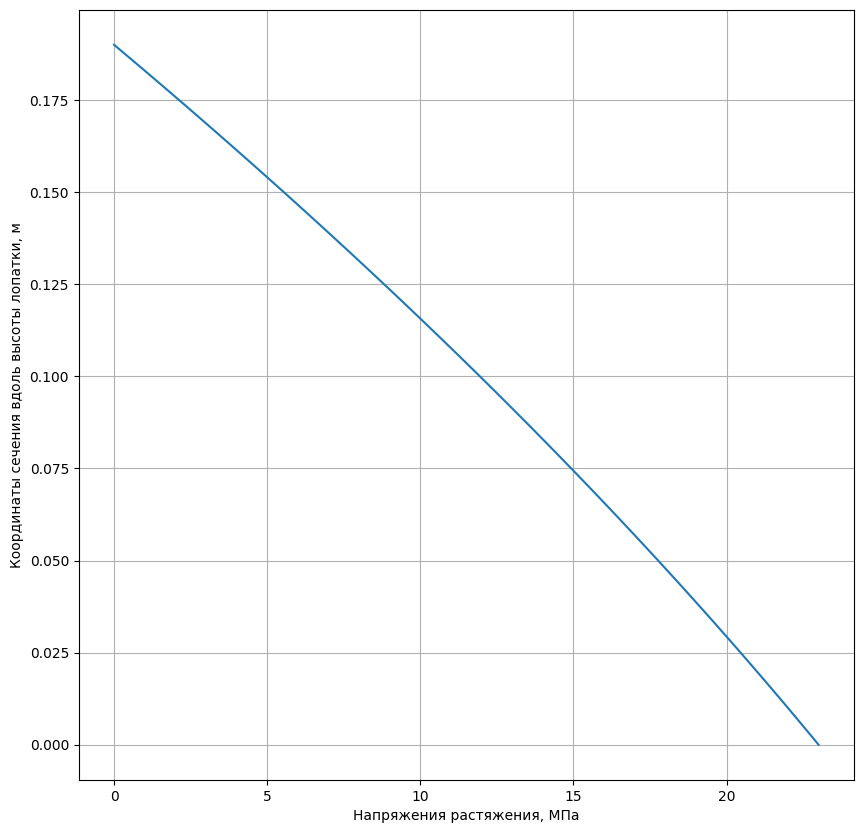

In [64]:
kr1.graf_tens(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water,ro,H_0, alpha_1e,avg_diameter,ksi_sum,n, ksi_sum_g, ro_metal)